# Coummunity Detection


Visualize the graph community for diverse time.

[weekdays]<br>
1. commuted time<br>
    6-10<br>
    16-21<br>
2. regular time(except commuted time)<br>
    10-16<br>
    
[weekends]<br>

3. time on weekends<br>
    6-10<br>
    10-16<br>
    16-21



In [1]:
import numpy as np
import pandas as pd
import pickle
import networkx as nx
import datetime as dt


import community as community_louvain

import folium
import matplotlib.cm as cm
import matplotlib.pyplot as plt


## Location EDA

- sensor location visualization
- community detection based on location

In [14]:
location = pd.read_csv('graph_sensor_locations_bay.csv',header = None)
location.columns=['sensor_id','latitude','longitude']
location

sensor_id   latitude   longitude
0       400001  37.364085 -121.901149
1       400017  37.253303 -121.945440
2       400030  37.359087 -121.906538
3       400040  37.294949 -121.873109
4       400045  37.363402 -121.902233
..         ...        ...         ...
320     413845  37.422887 -121.925747
321     413877  37.321613 -121.899642
322     413878  37.324641 -121.888603
323     414284  37.323066 -121.896538
324     414694  37.315051 -121.913497

[325 rows x 3 columns]

In [136]:
map_osm = folium.Map(location=[37.364085,-121.901149], zoom_start=12)


for i in location.index:
    # 행 우선 접근 방식으로 값 추출하기
    name = location.loc[i, 'sensor_id']
    lat = location.loc[i, 'latitude']
    lng = location.loc[i, 'longitude']
    
    # 추출한 정보를 지도에 표시
    marker = folium.Marker([lat,lng], popup=name, icon=folium.Icon(color='blue'))
    marker.add_to(map_osm)

map_osm._repr_html_()
map_osm

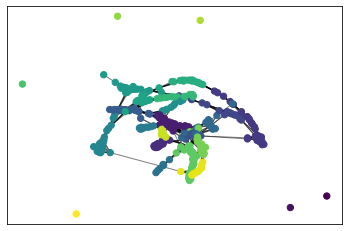

In [99]:
### Read adj_matrix (DCRNN>data)
with open('./adj_mx_bay.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    adj_bay = u.load()
adj_bay = np.array(adj_bay)[-1]
adj_bay

G = nx.Graph(adj_bay)
# compute the best partition
partition = community_louvain.best_partition(G)

'''
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()
'''


set(partition.values()) ## 25 communities

In [44]:
colors = ['orange', 'blue', 'lightblue', 'lightred', 'beige', 'darkred', 'lightgreen', 'darkblue', 'black', 'darkgreen', 'pink', 'cadetblue', 'white', 'green', 'gray', 'darkpurple', 'purple', 'lightgray', 'red']
len(colors)

19

In [49]:


map_osm = folium.Map(location=[37.364085,-121.901149], zoom_start=17)


for i in location.index:
    # 행 우선 접근 방식으로 값 추출하기
    name = location.loc[i, 'sensor_id']
    lat = location.loc[i, 'latitude']
    lng = location.loc[i, 'longitude']
    c = partition[i]
    # 추출한 정보를 지도에 표시 # coummunity 25개 찾았는데 색은 19개 뿐...ㅋㅋ
    if c <= 18:
        marker = folium.Marker([lat,lng], popup=name, icon=folium.Icon(color=colors[c]))
        marker.add_to(map_osm)


map_osm

## Comumunity detection by Speed

In [4]:
'''
### Read speed data to do prediction task
speed_bay = pd.read_hdf('./pems-bay.h5')
speed_bay

'''


"\n### Read speed data to do prediction task\nspeed_bay = pd.read_hdf('./pems-bay.h5')\nspeed_bay\n\n"

In [50]:

speed_bay = pd.read_csv("bay.csv")
speed_bay

Unnamed: 0  400001  400017  400030  400040  400045  400052  \
0      2017-01-01 00:00:00    71.4    67.8    70.5    67.4    68.8    66.6   
1      2017-01-01 00:05:00    71.6    67.5    70.6    67.5    68.7    66.6   
2      2017-01-01 00:10:00    71.6    67.6    70.2    67.4    68.7    66.1   
3      2017-01-01 00:15:00    71.1    67.5    70.3    68.0    68.5    66.7   
4      2017-01-01 00:20:00    71.7    67.8    70.2    68.1    68.4    66.9   
...                    ...     ...     ...     ...     ...     ...     ...   
52111  2017-06-30 23:35:00    70.9    66.3    68.4    61.0    61.8    66.9   
52112  2017-06-30 23:40:00    71.3    66.6    68.7    60.9    62.0    66.2   
52113  2017-06-30 23:45:00    71.4    66.9    68.1    61.1    62.0    66.7   
52114  2017-06-30 23:50:00    72.2    66.5    68.0    61.1    62.5    65.8   
52115  2017-06-30 23:55:00    71.5    66.2    68.4    61.5    62.8    66.1   

       400057  400059  400065  ...  409525  409526  409528  409529  413026  \
0        66.8    68.0    66.8  ...    68.8    67.9    68.8    68.0    69.2   
1        66.8    67.8    66.5  ...    68.4    67.3    68.4    67.6    70.4   
2        66.8    67.8    66.2  ...    68.4    67.4    68.4    67.5    70.2   
3        66.6    67.7    65.9  ...    68.5    67.5    68.5    67.5    70.4   
4        66.1    67.7    66.1  ...    68.5    67.7    68.5    67.4    69.6   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
52111    66.0    67.4    65.4  ...    64.6    66.8    64.7    61.1    68.4   
52112    66.5    68.2    64.9  ...    65.1    67.3    64.8    60.8    69.8   
52113    65.8    68.2    64.2  ...    64.9    66.5    64.6    61.3    69.5   
52114    67.1    68.3    64.0  ...    64.1    65.9    64.8    61.3    69.6   
52115    67.7    68.4    64.9  ...    64.3    66.5    64.8    60.9    70.9   

       413845  413877  413878  414284  414694  
0        68.9    70.4    68.8    71.1    68.0  
1        68.8    70.1    68.4    70.8    67.4  
2        68.3    69.8    68.4    70.5    67.9  
3        68.7    70.2    68.4    70.8    67.6  
4        69.1    70.0    68.4    71.0    67.9  
...       ...     ...     ...     ...     ...  
52111    61.4    70.5    68.2    71.6    66.2  
52112    62.2    69.4    68.6    71.6    68.4  
52113    63.8    70.6    68.4    71.6    66.6  
52114    64.2    70.2    68.7    71.6    68.4  
52115    63.4    70.3    68.7    71.6    68.0  

[52116 rows x 326 columns]

### add day_name

In [51]:
speed_bay['Unnamed: 0'] = pd.to_datetime(speed_bay['Unnamed: 0'])
speed_bay['w_name'] = speed_bay['Unnamed: 0'].dt.day_name()
speed_bay.head()

Unnamed: 0  400001  400017  400030  400040  400045  400052  400057  \
0 2017-01-01 00:00:00    71.4    67.8    70.5    67.4    68.8    66.6    66.8   
1 2017-01-01 00:05:00    71.6    67.5    70.6    67.5    68.7    66.6    66.8   
2 2017-01-01 00:10:00    71.6    67.6    70.2    67.4    68.7    66.1    66.8   
3 2017-01-01 00:15:00    71.1    67.5    70.3    68.0    68.5    66.7    66.6   
4 2017-01-01 00:20:00    71.7    67.8    70.2    68.1    68.4    66.9    66.1   

   400059  400065  ...  409526  409528  409529  413026  413845  413877  \
0    68.0    66.8  ...    67.9    68.8    68.0    69.2    68.9    70.4   
1    67.8    66.5  ...    67.3    68.4    67.6    70.4    68.8    70.1   
2    67.8    66.2  ...    67.4    68.4    67.5    70.2    68.3    69.8   
3    67.7    65.9  ...    67.5    68.5    67.5    70.4    68.7    70.2   
4    67.7    66.1  ...    67.7    68.5    67.4    69.6    69.1    70.0   

   413878  414284  414694  w_name  
0    68.8    71.1    68.0  Sunday  
1    68.4    70.8    67.4  Sunday  
2    68.4    70.5    67.9  Sunday  
3    68.4    70.8    67.6  Sunday  
4    68.4    71.0    67.9  Sunday  

[5 rows x 327 columns]

### seperate data by time

6-10,10-16,16-21

In [52]:
date_time = list(speed_bay['Unnamed: 0'])

In [53]:
six_to_10 = []
ten_to_16 =[]
sixteens_to_21 = []

for i in range(len(date_time)):
    if date_time[i].hour in range(6,10):
        six_to_10.append(speed_bay.iloc[i])
        
    elif speed_bay['Unnamed: 0'][i].hour in range(10,16):
        ten_to_16.append(speed_bay.iloc[i])
        
    elif speed_bay['Unnamed: 0'][i].hour in range(16,21):
        sixteens_to_21.append(speed_bay.iloc[i])
        
        
six_to_10 = pd.DataFrame(six_to_10)
ten_to_16 = pd.DataFrame(ten_to_16)
sixteens_to_21 = pd.DataFrame(sixteens_to_21)

### weekdays and weekends

In [77]:
six_to_10_S = six_to_10[(six_to_10['w_name'] == 'Sunday')| (six_to_10['w_name'] == 'Saturday')]
six_to_10_W = six_to_10[(six_to_10['w_name']!= 'Sunday') & (six_to_10['w_name'] != 'Saturday')]


ten_to_16_S = ten_to_16[(ten_to_16['w_name'] == 'Sunday')| (ten_to_16['w_name'] == 'Saturday')]
ten_to_16_W = ten_to_16[(ten_to_16['w_name']!= 'Sunday') & (ten_to_16['w_name'] != 'Saturday')]

sixteens_to_21_S = sixteens_to_21[(sixteens_to_21['w_name'] == 'Sunday')| (sixteens_to_21['w_name'] == 'Saturday')]
sixteens_to_21_W = sixteens_to_21[(sixteens_to_21['w_name']!= 'Sunday') & (sixteens_to_21['w_name'] != 'Saturday')]


In [78]:
six_to_10_W

Unnamed: 0  400001  400017  400030  400040  400045  400052  \
360   2017-01-02 06:00:00    67.0    68.2    68.6    67.1    67.9    65.9   
361   2017-01-02 06:05:00    64.9    67.7    68.1    68.2    67.1    64.8   
362   2017-01-02 06:10:00    64.9    67.8    67.4    67.7    66.7    62.6   
363   2017-01-02 06:15:00    64.7    67.6    67.5    67.8    66.5    61.3   
364   2017-01-02 06:20:00    64.1    67.4    67.4    67.5    66.2    58.6   
...                   ...     ...     ...     ...     ...     ...     ...   
51943 2017-06-30 09:35:00    62.7    64.9    59.0    55.5    35.8    63.0   
51944 2017-06-30 09:40:00    63.2    65.3    58.2    55.7    37.7    64.1   
51945 2017-06-30 09:45:00    62.0    65.5    56.5    56.3    47.6    65.0   
51946 2017-06-30 09:50:00    61.4    64.9    56.9    55.0    52.0    64.5   
51947 2017-06-30 09:55:00    61.9    64.9    58.8    56.6    53.7    64.5   

       400057  400059  400065  ...  409526  409528  409529  413026  413845  \
360      68.4    67.3    65.0  ...    64.6    67.8    66.6    68.2    55.9   
361      67.0    66.9    65.7  ...    66.2    67.1    66.1    67.8    63.5   
362      67.1    66.5    65.9  ...    66.9    66.8    65.7    66.5    65.3   
363      66.7    66.4    65.6  ...    66.3    66.6    65.4    66.5    66.7   
364      65.2    66.4    64.7  ...    66.1    66.4    65.3    66.3    65.7   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
51943    53.0    66.7    58.4  ...    62.7    59.7    56.2    62.4    30.8   
51944    57.5    66.2    60.4  ...    61.9    59.7    56.5    63.1    32.7   
51945    59.4    64.5    61.7  ...    63.1    59.9    56.4    62.5    31.5   
51946    58.1    66.4    61.5  ...    64.2    60.2    57.2    62.0    31.1   
51947    59.6    66.1    62.6  ...    63.9    59.4    55.3    62.1    30.3   

       413877  413878  414284  414694  w_name  
360      71.7    67.7    70.0    67.1  Monday  
361      71.8    67.0    68.9    67.0  Monday  
362      71.1    66.7    68.2    65.7  Monday  
363      69.9    66.5    68.0    64.2  Monday  
364      69.8    66.3    66.3    63.5  Monday  
...       ...     ...     ...     ...     ...  
51943    72.1    62.6    67.5    61.3  Friday  
51944    74.2    61.5    67.4    61.4  Friday  
51945    74.3    62.1    67.6    62.9  Friday  
51946    72.9    62.4    67.5    63.8  Friday  
51947    74.4    62.9    67.8    64.0  Friday  

[6240 rows x 327 columns]

### make adjacent matrix

- for mean of sensor's speed
- by using gaussian kernels

In [79]:
def Gaussian(x,z,sigma):
    return np.exp((-(np.linalg.norm(x-z)**2))/(2*sigma**2))

def GaussianMatrix(X,sigma):
    row,col=X.shape
    GassMatrix=np.zeros(shape=(row,row))
    X=np.asarray(X)
    i=0
    for v_i in X:
        j=0
        for v_j in X:
            GassMatrix[i,j]=Gaussian(v_i.T,v_j.T,sigma)
            j+=1
        i+=1
    return GassMatrix

def adj_mat_speed(data):
    mean = pd.DataFrame(data.mean(axis = 0))
    adj_mat = GaussianMatrix(mean,sigma = 1)
    
    return adj_mat

In [123]:
def visualization_community(data,location):
    
    G = nx.Graph(adj_mat_speed(data))
    # compute the best partition
    partition = community_louvain.best_partition(G)
    
    stat = pd.DataFrame(data.mean(axis = 0),columns = ['AvgSpeed'])
    stat['community'] = partition.values()
    report = stat.groupby(stat['community']).describe()
    report.index = colors[:len(report)]
    print(report)
    
    
    map_osm = folium.Map(location=[37.364085,-121.901149], zoom_start=12)

    for i in location.index:
        # 행 우선 접근 방식으로 값 추출하기
        name = location.loc[i, 'sensor_id']
        lat = location.loc[i, 'latitude']
        lng = location.loc[i, 'longitude']
        c = partition[i]
        
        # can visualize 18th community.(because of limiation of Marker)
        if c <= 18:
            marker = folium.Marker([lat,lng], popup=name, icon=folium.Icon(color=colors[c]))
            marker.add_to(map_osm)

    return map_osm

### 6-10 weekdays

In [125]:
visualization_community(six_to_10_W,location)

<ipython-input-79-e222ea16b736>:18: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = pd.DataFrame(data.mean(axis = 0))
<ipython-input-123-cea93cbe2131>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  stat = pd.DataFrame(data.mean(axis = 0),columns = ['AvgSpeed'])


          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange        44.0  51.945629  1.830737  48.252660  50.424251  52.099231   
blue          95.0  65.442404  1.308366  63.764615  64.466066  65.125112   
lightblue     50.0  43.554488  2.417657  38.995288  41.580040  43.507364   
lightred      51.0  62.530646  0.615508  61.420529  62.109511  62.519663   
beige         68.0  58.676992  1.634135  55.483141  57.623337  58.678670   
darkred       17.0  34.381105  2.781774  29.460321  32.413718  34.656394   

                                 
                 75%        max  
orange     53.157019  54.944679  
blue       65.986138  69.678654  
lightblue  45.853862  47.790801  
lightred   63.034191  63.665176  
beige      60.069523  61.147981  
darkred    36.708894  37.883846  


### 6-10 weekends

In [126]:
visualization_community(six_to_10_S,location)

<ipython-input-79-e222ea16b736>:18: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = pd.DataFrame(data.mean(axis = 0))
<ipython-input-123-cea93cbe2131>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  stat = pd.DataFrame(data.mean(axis = 0),columns = ['AvgSpeed'])


          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange       126.0  68.178034  0.984428  67.064992  67.442085  67.922569   
blue          98.0  64.170916  1.196539  60.138235  63.522151  64.452247   
lightblue     97.0  66.427086  0.375960  65.701757  66.134926  66.466013   
lightred       1.0  49.420874       NaN  49.420874  49.420874  49.420874   
beige          3.0  58.813045  0.523310  58.419240  58.516136  58.613031   

                                 
                 75%        max  
orange     68.505341  71.556413  
blue       65.010243  65.678472  
lightblue  66.747345  67.039828  
lightred   49.420874  49.420874  
beige      59.009947  59.406863  


### 6-10 all days

In [127]:
visualization_community(six_to_10,location)

<ipython-input-79-e222ea16b736>:18: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = pd.DataFrame(data.mean(axis = 0))
<ipython-input-123-cea93cbe2131>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  stat = pd.DataFrame(data.mean(axis = 0),columns = ['AvgSpeed'])


          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange        43.0  56.430829  1.274290  53.957585  55.604414  56.249712   
blue         100.0  65.910328  1.214617  64.426047  65.052573  65.613455   
lightblue     61.0  49.722879  2.294830  44.628626  48.174632  49.804132   
lightred      54.0  63.273537  0.614358  62.128764  62.931526  63.239129   
beige         56.0  60.543980  0.987137  58.718750  59.736018  60.445246   
darkred       11.0  41.891575  1.568642  39.016897  40.968710  41.972376   

                                 
                 75%        max  
orange     57.432366  58.408840  
blue       66.431759  70.207746  
lightblue  51.651001  53.685820  
lightred   63.642941  64.308253  
beige      61.367792  61.992116  
darkred    43.291229  43.831181  


In [ ]:
six_to_10_S = six_to_10[(six_to_10['w_name'] == 'Sunday')| (six_to_10['w_name'] == 'Saturday')]
six_to_10_W = six_to_10[(six_to_10['w_name']!= 'Sunday') & (six_to_10['w_name'] != 'Saturday')]


ten_to_16_S = ten_to_16[(ten_to_16['w_name'] == 'Sunday')| (ten_to_16['w_name'] == 'Saturday')]
ten_to_16_W = ten_to_16[(ten_to_16['w_name']!= 'Sunday') & (ten_to_16['w_name'] != 'Saturday')]

sixteens_to_21_S = sixteens_to_21[(sixteens_to_21['w_name'] == 'Sunday')| (sixteens_to_21['w_name'] == 'Saturday')]
sixteens_to_21_W = sixteens_to_21[(sixteens_to_21['w_name']!= 'Sunday') & (sixteens_to_21['w_name'] != 'Saturday')]


### 10-16 weekdays

In [128]:
visualization_community(ten_to_16_W,location)

<ipython-input-79-e222ea16b736>:18: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = pd.DataFrame(data.mean(axis = 0))
<ipython-input-123-cea93cbe2131>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  stat = pd.DataFrame(data.mean(axis = 0),columns = ['AvgSpeed'])


          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange       111.0  64.704244  1.256437  62.970962  63.645775  64.373494   
blue         119.0  57.766356  1.991877  50.955481  56.768702  58.067286   
lightblue     89.0  61.793241  0.644303  60.594669  61.289177  61.788707   
lightred       6.0  46.266766  1.515718  44.218045  45.520649  45.949386   

                                 
                 75%        max  
orange     65.651560  68.418547  
blue       59.285187  60.518301  
lightblue  62.347991  62.922179  
lightred   47.397561  48.225759  


### 10-16 weekends

In [129]:
visualization_community(ten_to_16_S,location)

<ipython-input-79-e222ea16b736>:18: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = pd.DataFrame(data.mean(axis = 0))
<ipython-input-123-cea93cbe2131>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  stat = pd.DataFrame(data.mean(axis = 0),columns = ['AvgSpeed'])


          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange       105.0  67.066516  0.951218  65.769009  66.402260  66.720261   
blue         105.0  61.916229  1.283054  58.818764  61.028023  62.222249   
lightblue     22.0  55.876432  2.097826  51.494935  54.380855  56.165591   
lightred      90.0  64.813380  0.543951  63.783415  64.366006  64.828568   
beige          3.0  46.307925  1.814117  44.761029  45.309572  45.858115   

                                 
                 75%        max  
orange     67.638426  69.890005  
blue       62.936819  63.753622  
lightblue  57.644513  58.365414  
lightred   65.266136  65.715441  
beige      47.081373  48.304630  


### 10-16 all days

In [130]:
visualization_community(ten_to_16,location)

<ipython-input-79-e222ea16b736>:18: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = pd.DataFrame(data.mean(axis = 0))
<ipython-input-123-cea93cbe2131>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  stat = pd.DataFrame(data.mean(axis = 0),columns = ['AvgSpeed'])


          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange       120.0  65.060884  1.201335  63.408809  64.061199  64.794863   
blue         106.0  58.763803  1.533801  54.745450  57.796108  58.973201   
lightblue     89.0  62.283354  0.565981  61.134638  61.842887  62.242434   
lightred      10.0  51.077822  1.676865  47.659423  50.008961  51.763191   

                                 
                 75%        max  
orange     65.801665  68.704497  
blue       59.930298  61.022560  
lightblue  62.776481  63.317595  
lightred   52.280485  52.824747  


### 16-21 weekdays

In [131]:
visualization_community(sixteens_to_21_W,location)

<ipython-input-79-e222ea16b736>:18: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = pd.DataFrame(data.mean(axis = 0))
<ipython-input-123-cea93cbe2131>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  stat = pd.DataFrame(data.mean(axis = 0),columns = ['AvgSpeed'])


          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange        72.0  66.691090  1.192995  65.166167  65.854006  66.341083   
blue          64.0  42.411528  3.423526  33.778590  40.222324  42.932596   
lightblue     60.0  52.111813  2.123578  48.265256  50.520160  51.892667   
lightred      65.0  59.904424  2.020916  56.389564  57.958628  60.145090   
beige          4.0  29.611564  1.657117  27.617987  28.704872  29.668340   
darkred       60.0  64.016527  0.645350  62.784564  63.550926  64.011628   

                                 
                 75%        max  
orange     67.338247  70.717000  
blue       45.070750  47.676167  
lightblue  53.935587  55.838872  
lightred   61.569641  62.710821  
beige      30.575032  31.491590  
darkred    64.562378  65.100256  


### 16-21 weekends

In [132]:
visualization_community(sixteens_to_21_S,location)

<ipython-input-79-e222ea16b736>:18: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = pd.DataFrame(data.mean(axis = 0))
<ipython-input-123-cea93cbe2131>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  stat = pd.DataFrame(data.mean(axis = 0),columns = ['AvgSpeed'])


          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange       114.0  67.428039  1.016781  66.146373  66.617712  67.157484   
blue         103.0  63.762338  0.817393  62.030948  63.267631  63.890065   
lightblue     55.0  65.529357  0.318423  64.950948  65.258056  65.592745   
lightred      53.0  58.584564  3.493826  47.762353  57.266111  60.040359   

                                 
                 75%        max  
orange     67.929959  70.818824  
blue       64.378807  64.926275  
lightblue  65.746634  66.101144  
lightred   61.039510  61.801405  


### 16-21 all days

In [133]:
visualization_community(sixteens_to_21,location)

<ipython-input-79-e222ea16b736>:18: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = pd.DataFrame(data.mean(axis = 0))
<ipython-input-123-cea93cbe2131>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  stat = pd.DataFrame(data.mean(axis = 0),columns = ['AvgSpeed'])


          AvgSpeed                                                        \
             count       mean       std        min        25%        50%   
orange        79.0  66.700159  1.179921  65.072965  65.698854  66.474227   
blue          61.0  47.973978  2.686039  41.003702  46.533158  48.155755   
lightblue     51.0  54.464947  1.268334  52.043536  53.461966  54.537247   
lightred      51.0  59.166440  1.209696  56.986262  58.169673  59.295552   
beige         80.0  63.555118  0.947461  61.634521  62.923444  63.776045   
darkred        3.0  38.641562  0.811648  37.738011  38.307891  38.877772   

                                 
                 75%        max  
orange     67.282878  70.513462  
blue       50.091142  51.810258  
lightblue  55.446469  56.728950  
lightred   60.143283  61.109116  
beige      64.320322  65.014107  
darkred    39.093338  39.308904  
